# Life Expectancy Function 👨‍👩‍👧

##### Unhide to see imports and the feature engineering function.

In [39]:
# Import the necessary libraries:
import numpy as np
import pandas as pd

In [40]:
# Adapt this function so it allows for both models.
# Perform feature engineering on the data:
def feature_eng(df):
    df = df.copy()  # Good practice to use a copy

    # Log transformation of the GDP column and the Incidents_HIV column:
    df['GDP_per_capita_log'] = df['GDP_per_capita'].apply(lambda x: np.log(x))
    if 'Incidents_HIV' in df.columns:
        df['Incidents_HIV_log'] = df['Incidents_HIV'].apply(lambda x: -np.log(x))

    # One-hot encode the 'Region' column if it's within the dataframe:
    if 'Region' in df.columns:
        # Clean the Region column by replacing spaces with underscores and strip extra spaces
        df['Region'] = df['Region'].str.replace(" ", "_").str.strip()
        df = pd.get_dummies(df, columns = ['Region'], drop_first = False, prefix = 'Region', dtype = int)

    # Return the feature engineered result
    return df

##### 

The following function takes inputs from the user and outputs their predicted life expectancy. There are two options for the user to choose:
- Most accurate model (but requires more sensitive information)
- Most ethical model (less accurate than the above but requires no sensitive information)

Once the user chooses their preferred model they will be prompted to input the data required for the function to work. If the user inputs any data incorrectly e.g. in the wrong format or in an unacceptable range, an error message will be returned which tells them what they need to enter next time to rectify this error. 

Once the data has been correctly inputted the code will run and return their predicted life expectancy based on the data provided.

In [43]:
def life_expectancy():
    y_n = input("Do you consent to using advanced population data, which may include protected information, for better accuracy? (Y/N)")
    if y_n.lower() == 'y':    # Allow for non-capitalised letters
        
        try:
            Year = int(input("Enter the year the data was collected: YYYY"))
            # Assert the year is within a reasonable range (e.g., 1900 to 2040)
            assert 1900 <= Year <= 2040, "Year must be between 1900 and 2040"  # Modify the range as needed
        except ValueError:
            print("Error: Please enter a valid integer for the year.")
            raise   
        except AssertionError as e:
            print(f"Error: {e}")
            raise  
        
        try:
            Infant_deaths = float(input("Enter the number of infant deaths per 1000"))
            # Assert the value is within a reasonable range
            assert 0 <= Infant_deaths <= 1000, "Infant deaths per 1000 must be between 0 and 1000."
        except ValueError:
            print("Error: Please enter a valid number for infant deaths.")
            raise 
        except AssertionError as e:
            print(f"Error: {e}")
            raise 
        
        try:
            Under_five_deaths = float(input("Enter the number of under-5 deaths per 1000"))
            # Assert the value is within a reasonable range (e.g., 0 <= value <= 1000)
            assert 0 <= Under_five_deaths <= 1000, "Under-5 deaths per 1000 must be between 0 and 1000."
        except ValueError:
            print("Error: Please enter a valid number for under-5 deaths.")
            raise 
        except AssertionError as e:
            print(f"Error: {e}")
            raise 
        
        try:
            Adult_mortality = float(input("Enter the adult mortality rate. (Probability of dying between 15 and 60 years per 1000 population)."))
            # Assert the value is within a reasonable range (e.g., 0 <= value <= 1000)
            assert 0 <= Adult_mortality <= 1000, "Adult mortality rate must be between 0 and 1000."
        except ValueError:
            print("Error: Please enter a valid number for adult mortality.")
            raise 
        except AssertionError as e:
            print(f"Error: {e}")
            raise 
        
        try:
            Hepatitis_B = float(input("Enter the Hepatitis-B immunisation coverage among 1-year olds percentage"))
            # Assert the value is within a reasonable range (0 <= value <= 100)
            assert 0 <= Hepatitis_B <= 100, "Hepatitis-B immunisation coverage must be between 0 and 100."
        except ValueError:
            print("Error: Please enter a valid number for Hepatitis-B immunisation coverage.")
            raise 
        except AssertionError as e:
            print(f"Error: {e}")
            raise 
        
        try:
            # Get user input and convert to float
            BMI = float(input("Enter the average BMI of the entire population: "))
            # Assert the value is within a reasonable range (e.g., 10 <= value <= 50)
            assert 10 <= BMI <= 50, "BMI must be between 10 and 50."
        except ValueError:
            print("Error: Please enter a valid number for BMI.")
            raise 
        except AssertionError as e:
            print(f"Error: {e}")
            raise 
        
        try:
            # Get user input and convert to float
            Polio = float(input("Enter the Polio immunisation coverage among 1-year olds percentage: "))
            # Assert the value is within a reasonable range (0 <= value <= 100)
            assert 0 <= Polio <= 100, "Polio immunisation coverage must be between 0 and 100."
        except ValueError:
            print("Error: Please enter a valid number for Polio immunisation coverage.")
            raise 
        except AssertionError as e:
            print(f"Error: {e}")
            raise 
        
        try:
            # Get user input and convert to float
            Incidents_HIV = float(input("Enter the deaths per 1000 of live births relating to HIV/AIDS (Between 0-4 years): "))
            # Assert the value is within a reasonable range (0 <= value <= 1000)
            assert 0 <= Incidents_HIV <= 1000, "Deaths per 1000 live births for HIV/AIDS must be between 0 and 1000."
        except ValueError:
            print("Error: Please enter a valid number for HIV/AIDS deaths per 1000 live births.")
            raise 
        except AssertionError as e:
            print(f"Error: {e}")
            raise
            
        try:
            # Get user input and convert to float
            GDP_per_capita = float(input("Enter the GDP per capita in USD: "))
            # Assert the value is within a reasonable range (e.g., 100 <= value <= 200000)
            assert 100 <= GDP_per_capita <= 200000, "GDP per capita must be between 100 and 200,000 USD."
        except ValueError:
            print("Error: Please enter a valid number for GDP per capita.")
            raise
        except AssertionError as e:
            print(f"Error: {e}")
            raise
        
        try:
            # Get user input and convert to float
            Thinness_ten_nineteen_years = float(input("Enter the prevalence of thinness among children and adolescents for age 10 to 19 (%): "))
            # Assert the value is within a reasonable range (0% to 100%)
            assert 0 <= Thinness_ten_nineteen_years <= 100, "Prevalence of thinness must be between 0% and 100%."
            print(f"Prevalence of thinness (10-19 years): {Thinness_ten_nineteen_years}%")
        except ValueError:
            print("Error: Please enter a valid number for the prevalence of thinness.")
            raise
        except AssertionError as e:
            print(f"Error: {e}")
            raise
        
        try:
            # Get user input and convert to float
            Schooling = float(input("Enter the number of years of Schooling: "))
            # Assert the value is within a reasonable range (0 to 20 years)
            assert 0 <= Schooling <= 20, "The number of years of schooling must be between 0 and 20."
            print(f"The entered number of years of schooling is: {Schooling} years.")
        except ValueError:
            print("Error: Please enter a valid number for the years of schooling.")
            raise
        except AssertionError as e:
            print(f"Error: {e}")
            raise
                
        try:
            # Get user input and convert to integer
            Economy_status_Developed = int(input("Enter a 1 if the country is developed or a 0 if not: "))
            # Assert the value is either 1 or 0
            assert Economy_status_Developed in (0, 1), "Input must be 1 for developed or 0 for not developed."
        except ValueError:
            print("Error: Please enter a valid integer (1 or 0).")
            raise
        except AssertionError as e:
            print(f"Error: {e}")
            raise
                
        try:
            # Get user input
            Region = input("Enter the region the data is from (Middle East, European Union, Asia, South America, Central America and Caribbean, Rest of Europe, Africa, Oceania, North America):")
            # Assert the value is within the list
            assert((Region.lower() == 'middle east') | (Region.lower() == 'european union') | (Region.lower() == 'asia') | 
               (Region.lower() == 'south america') | (Region.lower() == 'central america and caribbean') | (Region.lower() == 'rest of europe') | 
               (Region.lower() == 'africa') | (Region.lower() == 'oceania') | (Region.lower() == 'north america')), "Enter a valid region from the list"
        except AssertionError as e:
            print(f"Error: {e}")
            raise

        
        # Make a df of this data:
        data = pd.DataFrame([[Year, Infant_deaths, Under_five_deaths, Adult_mortality, Hepatitis_B, BMI, Polio, Incidents_HIV, GDP_per_capita, Thinness_ten_nineteen_years, Schooling, Economy_status_Developed, Region]], 
                            columns = ['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Hepatitis_B', 'BMI', 'Polio', 'Incidents_HIV', 'GDP_per_capita',
                                       'Thinness_ten_nineteen_years', 'Schooling', 'Economy_status_Developed', 'Region'])

        # Feature engineering:
        data_fe = feature_eng(data)

        # Scaling:
        data_fe['Year'] = (data_fe['Year'] - 2007.545177) / 4.615905
        data_fe['Infant_deaths'] = (data_fe['Infant_deaths'] - 30.147796) / 27.477380
        data_fe['Under_five_deaths'] = (data_fe['Under_five_deaths'] - 42.556482) / 44.387949
        data_fe['Adult_mortality'] = (data_fe['Adult_mortality'] - 191.713316) / 114.710734
        data_fe['Hepatitis_B'] = (data_fe['Hepatitis_B'] - 84.414230) / 15.896196
        data_fe['BMI'] = (data_fe['BMI'] - 25.051768) / 2.178844
        data_fe['Polio'] = (data_fe['Polio'] - 86.571366) / 14.991280
        data_fe['Incidents_HIV_log'] = (data_fe['Incidents_HIV_log'] - 1.603508) / 1.570609
        data_fe['GDP_per_capita_log'] = (data_fe['GDP_per_capita_log'] - 8.407663565737732) / 1.4422193901402558
        data_fe['Thinness_ten_nineteen_years'] = (data_fe['Thinness_ten_nineteen_years'] - 4.835923) / 4.407357
        data_fe['Schooling'] = (data_fe['Schooling'] - 7.652728) / 3.166025
        data_fe['Economy_status_Developed'] = (data_fe['Economy_status_Developed'] - 0.207770) / 0.405799

        return (68.5279 + (data_fe['Year'] * 0.1920) + (data_fe['Infant_deaths'] * -1.3676) + (data_fe['Under_five_deaths'] * -2.1568) + (data_fe['Adult_mortality'] * -4.9577) +
                (data_fe['Hepatitis_B'] * -0.1585) + (data_fe['BMI'] * -0.3186) + (data_fe['Polio'] * 0.1352) + (data_fe['Incidents_HIV_log'] * 0.1352) +
                (data_fe['GDP_per_capita_log'] * 0.7005) + (data_fe['Thinness_ten_nineteen_years'] * -0.0770) + (data_fe['Schooling'] * 0.2143) + (data_fe['Economy_status_Developed'] * 1.0256) +
                (data_fe.get('Region_Asia', 0) * 0.3042) + (data_fe.get('Region_Central America and Caribbean', 0) * 1.8584) + (data_fe.get('Region_European Union', 0) * -0.9492) +
                (data_fe.get('Region_Middle East', 0) * 0.0629) + (data_fe.get('Region_North America', 0) * 0.5788) + (data_fe.get('Region_Oceania', 0) * -0.8596) +
                (data_fe.get('Region_Rest of Europe', 0) * 0.2332) + (data_fe.get('Region_South America', 0) * 1.5122))
        
    
    elif y_n.lower() == 'n':    # Allow for non-capitalised letters
        
        try:
            Year = int(input("Enter the year the data was collected: YYYY"))
            # Assert the year is within a reasonable range (e.g., 1900 to 2040)
            assert 1900 <= Year <= 2040, "Year must be between 1900 and 2040"  # Modify the range as needed
        except ValueError:
            print("Error: Please enter a valid integer for the year.")
            raise   
        except AssertionError as e:
            print(f"Error: {e}")
            raise  

        try:
            Adult_mortality = float(input("Enter the adult mortality rate. (Probability of dying between 15 and 60 years per 1000 population): "))
            # Assert the value is within a reasonable range (e.g., 0 <= value <= 1000)
            assert 0 <= Adult_mortality <= 1000, "Adult mortality rate must be between 0 and 1000." 
        except ValueError:
            print("Error: Please enter a valid number for adult mortality.")
            raise 
        except AssertionError as e:
            print(f"Error: {e}")
            raise 

        try:
            # Get user input and convert to float
            GDP_per_capita = float(input("Enter the GDP per capita in USD: "))
            # Assert the value is within a reasonable range (e.g., 100 <= value <= 200000)
            assert 100 <= GDP_per_capita <= 200000, "GDP per capita must be between 100 and 200,000 USD."
        except ValueError:
            print("Error: Please enter a valid number for GDP per capita.")
            raise
        except AssertionError as e:
            print(f"Error: {e}")
            raise
        
        try:
            # Get user input and convert to float
            Alcohol_consumption = float(input("Enter the alcohol consumption recorded per capita (litres): "))
            # Assert the value is within a reasonable range (e.g., 100 <= value <= 200000)
            assert 0 <= Alcohol_consumption <= 20, "Alcohol consumption must be between 0 and 20 litres."
        except ValueError:
            print("Error: Please enter a valid number for alcohol consumption.")
            raise
        except AssertionError as e:
            print(f"Error: {e}")
            raise

        # Make a df of this data:
        data = pd.DataFrame([[Year, Adult_mortality, GDP_per_capita, Alcohol_consumption]], 
                            columns = ['Year', "Adult_mortality", "GDP_per_capita", "Alcohol_consumption"])

        # Feature engineering:
        data_fe = feature_eng(data)

        
        # Scaling:
        data_fe['Year'] = (data_fe['Year'] - 2007.545177) / 4.615905
        data_fe['Adult_mortality'] = (data_fe['Adult_mortality'] - 191.713316) / 114.710734
        data_fe['GDP_per_capita_log'] = (data_fe['GDP_per_capita_log'] - 8.407663565737732) / 1.4422193901402558
        data_fe['Alcohol_consumption'] = (data_fe['Alcohol_consumption'] - 4.820882) / 3.981949

        return (68.9270 + (data_fe['Year'] * 0.1972) + (data_fe['Adult_mortality'] * -6.8415) + (data_fe['GDP_per_capita_log'] * 1.4711) + (data_fe['Alcohol_consumption'] * 0.8304))
    
    else:
        print("Input either 'Y' (you consent to using advanced population data) or 'N' (you do not consent to using advanced population data).")

In [87]:
### Check the function:
life_expectancy()

Do you consent to using advanced population data, which may include protected information, for better accuracy? (Y/N) N
Enter the year the data was collected: YYYY 2011
Enter the adult mortality rate. (Probability of dying between 15 and 60 years per 1000 population):  166.204
Enter the GDP per capita in USD:  1246
Enter the alcohol consumption recorded per capita (litres):  0.04


0    68.293394
dtype: float64

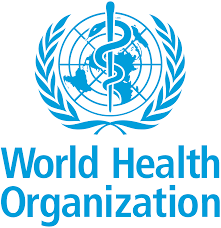